In [1]:
# Code to get all the Posterior mean (95% Equal-tail CI) (95% HPD CI) HPD-CI-width from ./xenarthra_mcmc_out.txt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Read the file
file = open("LG_G4_C20_cm_out.txt", "r")
lines = file.readlines()
file.close()

# Extract the data
data = []
mu_data = []
var_data = []

read_flag = False
for line in lines:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data.append(line)
    if read_flag and line.startswith("mu"):
        mu_data.append(line)
    if read_flag and line.startswith("sigma"):
        var_data.append(line)

In [2]:
data

['t_n55          6.6877 ( 6.4235,  7.2371) ( 6.3682,  7.1088)  0.7405 (Jnode 106)\n',
 't_n56          6.5152 ( 6.3663,  6.6924) ( 6.3594,  6.6828)  0.3235 (Jnode 105)\n',
 't_n57          6.3568 ( 6.2437,  6.4627) ( 6.2480,  6.4666)  0.2186 (Jnode 104)\n',
 't_n58          6.0592 ( 5.9436,  6.1670) ( 5.9480,  6.1697)  0.2216 (Jnode 103)\n',
 't_n59          5.9875 ( 5.8714,  6.0960) ( 5.8771,  6.1008)  0.2237 (Jnode 102)\n',
 't_n60          5.8856 ( 5.7565,  6.0054) ( 5.7643,  6.0118)  0.2475 (Jnode 101)\n',
 't_n61          5.7332 ( 5.5564,  5.8808) ( 5.5628,  5.8852)  0.3224 (Jnode 100)\n',
 't_n62          3.9997 ( 1.8177,  5.0656) ( 2.2666,  5.1999)  2.9333 (Jnode 99)\n',
 't_n63          5.0887 ( 4.8265,  5.3431) ( 4.8185,  5.3331)  0.5147 (Jnode 98)\n',
 't_n64          4.5279 ( 4.3853,  4.6792) ( 4.3936,  4.6856)  0.2920 (Jnode 97)\n',
 't_n65          4.2685 ( 4.2084,  4.4143) ( 4.2062,  4.3822)  0.1760 (Jnode 96)\n',
 't_n66          3.4966 ( 3.4520,  3.5187) ( 3.4596,  3.52

In [3]:
node_name = []
posterior_mean_iqtree = []
posterior_mean_baseml = []

posterior_mean_mu_iqtree = []
posterior_mean_mu_baseml = []

posterior_mean_var_iqtree = []
posterior_mean_var_baseml = []

lower_ci_iqtree = []
upper_ci_iqtree = []

lower_ci_mu_iqtree = []
upper_ci_mu_iqtree = []

lower_ci_var_iqtree = []
upper_ci_var_iqtree = []

# Credible intervals for McmcDate
lower_ci_baseml = []
upper_ci_baseml = []

lower_ci_mu_baseml = []
upper_ci_mu_baseml = []

lower_ci_var_baseml = []
upper_ci_var_baseml = []

In [4]:
for line in data:
    line = line.strip().split()
    node_name.append(line[0])
    posterior_mean_iqtree.append(float(line[1]))
#     if line[3].startswith('('):
#         lower_ci_iqtree.append(float(line[3][1:-1]))
#     else:
#         lower_ci_iqtree.append(float(line[3][1:-1]))
#     if line[4].startswith('('):
#         upper_ci_iqtree.append(float(line[4][1:-1]))
#     else:
#         upper_ci_iqtree.append(float(line[4][:-1]))
#     # posterior_mean_baseml.append(float(line[4]))
#     # lower_ci_baseml.append(float(line[5]))
#     # upper_ci_baseml.append(float(line[6]))
# 
# for line in mu_data:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_mu_iqtree.append(float(line[1]))
#     lower_ci_mu_iqtree.append(float(line[3][:-1]))
#     upper_ci_mu_iqtree.append(float(line[4][:-1]))
#
# for line in var_data:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_var_iqtree.append(float(line[1]))
#     lower_ci_var_iqtree.append(float(line[3][:-1]))
#     upper_ci_var_iqtree.append(float(line[4][:-1]))

In [5]:
node_name

['t_n55',
 't_n56',
 't_n57',
 't_n58',
 't_n59',
 't_n60',
 't_n61',
 't_n62',
 't_n63',
 't_n64',
 't_n65',
 't_n66',
 't_n67',
 't_n68',
 't_n69',
 't_n70',
 't_n71',
 't_n72',
 't_n73',
 't_n74',
 't_n75',
 't_n76',
 't_n77',
 't_n78',
 't_n79',
 't_n80',
 't_n81',
 't_n82',
 't_n83',
 't_n84',
 't_n85',
 't_n86',
 't_n87',
 't_n88',
 't_n89',
 't_n90',
 't_n91',
 't_n92',
 't_n93',
 't_n94',
 't_n95',
 't_n96',
 't_n97',
 't_n98',
 't_n99',
 't_n100',
 't_n101',
 't_n102',
 't_n103',
 't_n104',
 't_n105',
 't_n106',
 't_n107']

In [6]:
posterior_mean_iqtree

[6.6877,
 6.5152,
 6.3568,
 6.0592,
 5.9875,
 5.8856,
 5.7332,
 3.9997,
 5.0887,
 4.5279,
 4.2685,
 3.4966,
 3.199,
 1.8819,
 0.9106,
 4.3951,
 5.9321,
 5.8299,
 5.7556,
 5.0445,
 4.7594,
 5.1659,
 5.8765,
 5.765,
 5.6823,
 5.5262,
 5.358,
 5.3076,
 5.1537,
 5.0197,
 4.859,
 4.0935,
 3.8302,
 5.0814,
 4.6214,
 5.8375,
 2.8356,
 5.786,
 5.654,
 5.455,
 5.3272,
 4.6166,
 4.9434,
 5.2695,
 5.1648,
 4.919,
 4.1046,
 4.8488,
 6.1139,
 5.3856,
 4.2183,
 3.9583,
 5.4558]

In [7]:
lower_ci_iqtree

[]

In [8]:
upper_ci_iqtree

[]

In [9]:
file_LG = open("LG_cm_out.txt", "r")
lines1 = file_LG.readlines()
file_LG.close()

# Extract the data
data1 = []
mu_data1 = []
var_data1 = []

read_flag = False
for line in lines1:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data1.append(line)
    if read_flag and line.startswith("mu"):
        mu_data1.append(line)
    if read_flag and line.startswith("sigma"):
        var_data1.append(line)

        
for line in data1:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_baseml.append(float(line[1]))
#     if line[3].startswith('('):
#         lower_ci_baseml.append(float(line[3][1:-1]))
#     else:
#          lower_ci_baseml.append(float(line[3][:-1]))
#     if line[4].startswith('('):
#         upper_ci_baseml.append(float(line[4][1:-1]))
#     else:
#          upper_ci_baseml.append(float(line[4][:-1]))
#         
#     
# for line in mu_data1:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_mu_baseml.append(float(line[1]))
#     lower_ci_mu_baseml.append(float(line[3][:-1]))
#     upper_ci_mu_baseml.append(float(line[4][:-1]))
    
# for line in var_data1:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_var_baseml.append(float(line[1]))
#     lower_ci_var_baseml.append(float(line[3][:-1]))
#     upper_ci_var_baseml.append(float(line[4][:-1]))

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# # Example data
# # Posterior means for MCMCtree (x-axis) and McmcDate (y-axis)
# posterior_mean_mcmctree = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# posterior_mean_mcmcdate = [110, 210, 310, 410, 510, 610, 710, 810, 910, 1010]
# 
# # Credible intervals for MCMCtree
# lower_ci_mcmctree = [90, 180, 270, 360, 450, 540, 630, 720, 810, 900]
# upper_ci_mcmctree = [110, 220, 330, 440, 550, 660, 770, 880, 990, 1100]
# 
# # Credible intervals for McmcDate
# lower_ci_mcmcdate = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# upper_ci_mcmcdate = [120, 220, 320, 420, 520, 620, 720, 820, 920, 1020]

# Calculate error bars
# xerr = [np.array(lower_ci_baseml), 
#         np.array(upper_ci_baseml)]
# yerr = [np.array(lower_ci_iqtree), 
#         np.array(upper_ci_iqtree)]
# 
# # Plotting
# fig, ax = plt.subplots(figsize=(15, 15))
# ax.plot([-0.1,90], 
#         [-0.1, 90], 
#         'k--', label='y=x')
# ax.errorbar(posterior_mean_baseml, posterior_mean_iqtree, 
#             xerr=xerr, yerr=yerr, fmt='*', ecolor='r', capsize=3, label='95% HPD CI')
# 
# # Labels and title
# ax.set_xlabel('Posterior mean age LG [100 Mya]', fontsize=18)
# ax.set_ylabel('Posterior mean age LG+G4 [100 Mya]', fontsize=18)
# ax.set_title('Posterior mean age comparison between LG and LG+G4 models [t116 ~ B(1.25,2.482)]')
# ax.legend()
# 
# # Show plot
# # plt.show()
# plt.savefig('./animal_origin_posterior_mean_age_comparison_LG_G4_c11.png')

In [11]:
posterior_mean_baseml

[6.7484,
 6.6132,
 6.3617,
 6.0952,
 5.9962,
 5.8609,
 5.6516,
 4.2185,
 5.0804,
 4.5598,
 4.2719,
 3.4945,
 3.2015,
 1.877,
 0.9247,
 4.4247,
 5.8842,
 5.3363,
 5.6838,
 5.0611,
 4.6602,
 5.1637,
 5.9208,
 5.7849,
 5.6793,
 5.5435,
 5.3809,
 5.3051,
 5.1558,
 5.0196,
 4.8206,
 4.215,
 3.7836,
 5.1016,
 4.6265,
 5.8592,
 3.6989,
 5.7907,
 5.6533,
 5.4606,
 5.3252,
 4.7348,
 4.9157,
 5.3143,
 5.1018,
 4.6516,
 4.3733,
 4.9219,
 6.1088,
 5.4774,
 4.4321,
 4.4162,
 5.6189]

In [12]:
posterior_mean_iqtree

[6.6877,
 6.5152,
 6.3568,
 6.0592,
 5.9875,
 5.8856,
 5.7332,
 3.9997,
 5.0887,
 4.5279,
 4.2685,
 3.4966,
 3.199,
 1.8819,
 0.9106,
 4.3951,
 5.9321,
 5.8299,
 5.7556,
 5.0445,
 4.7594,
 5.1659,
 5.8765,
 5.765,
 5.6823,
 5.5262,
 5.358,
 5.3076,
 5.1537,
 5.0197,
 4.859,
 4.0935,
 3.8302,
 5.0814,
 4.6214,
 5.8375,
 2.8356,
 5.786,
 5.654,
 5.455,
 5.3272,
 4.6166,
 4.9434,
 5.2695,
 5.1648,
 4.919,
 4.1046,
 4.8488,
 6.1139,
 5.3856,
 4.2183,
 3.9583,
 5.4558]

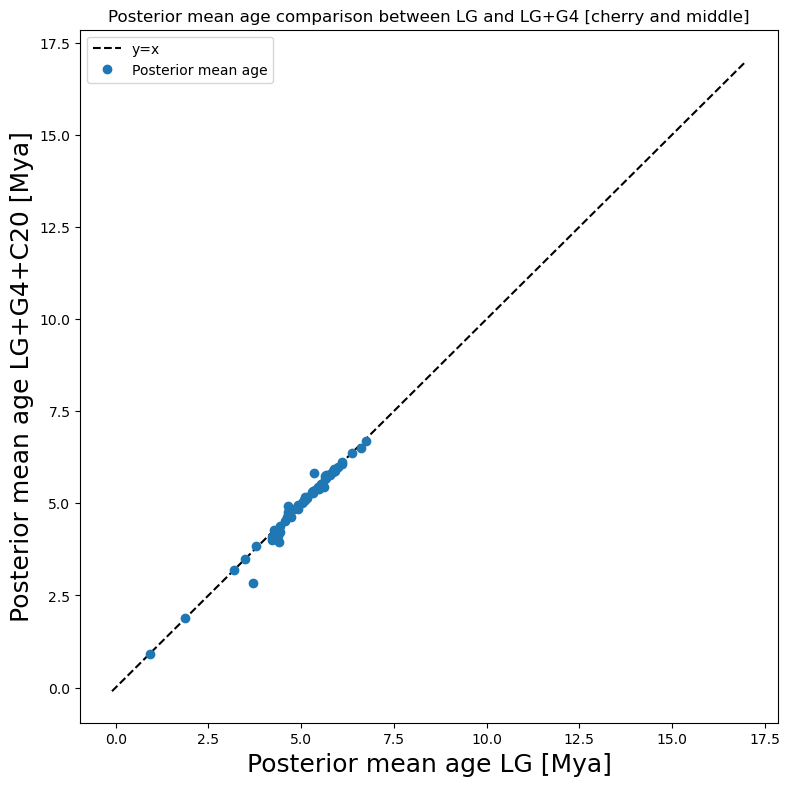

In [13]:
# Calculate error bars
xerr = [np.array(lower_ci_baseml), 
        np.array(upper_ci_baseml)]
yerr = [np.array(lower_ci_iqtree), 
        np.array(upper_ci_iqtree)]

# Plotting
fig, ax = plt.subplots(figsize=(9 ,9))
ax.plot([-0.1,17], 
        [-0.1, 17], 
        'k--', label='y=x')
ax.plot(posterior_mean_baseml, posterior_mean_iqtree, 'o', label='Posterior mean age')
 
# Labels and title
ax.set_xlabel('Posterior mean age LG [Mya]', fontsize=18)
ax.set_ylabel('Posterior mean age LG+G4+C20 [Mya]', fontsize=18)
ax.set_title('Posterior mean age comparison between LG and LG+G4 [cherry and middle]')
ax.legend()

# point_x = posterior_mean_baseml[0]  # Example: first point in the list
# point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# Show plot
# plt.show()
plt.savefig('metazoa_posterior_mean_age_comparison_LG_G4_C20_cm_scatter.png')

In [14]:
# fig, ax = plt.subplots(figsize=(9 ,9))
# ax.plot([0.01,0.04], 
#         [0.01, 0.04], 
#         'k--', label='y=x')
# ax.plot(posterior_mean_mu_baseml, posterior_mean_mu_iqtree, 'o', label='Posterior mean rates for partitions')
#  
# # Labels and title
# ax.set_xlabel('Posterior mean rate [LG]', fontsize=18)
# ax.set_ylabel('Posterior mean rate [LG+G4]', fontsize=18)
# ax.set_title('Posterior mean rate comparison between LG and LG+G4 [Cherry only calibration/IQ-TREE]')
# ax.legend()
# 
# # point_x = posterior_mean_baseml[0]  # Example: first point in the list
# # point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# # ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# # Show plot
# # plt.show()
# plt.savefig('./animal_origin__posterior_mean_rate_comparison_LG_G4_all_scatter.png')